<a href="https://colab.research.google.com/github/morixxfoxdata/TIL/blob/main/KerasAPI_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

In [ ]:
# Loading Fashion MNIST data from kerasAPI
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Checking data shape
print('Train_images:', train_images.shape, 'Test_images:', test_images.shape)

Train_images: (60000, 28, 28) Test_images: (10000, 28, 28)


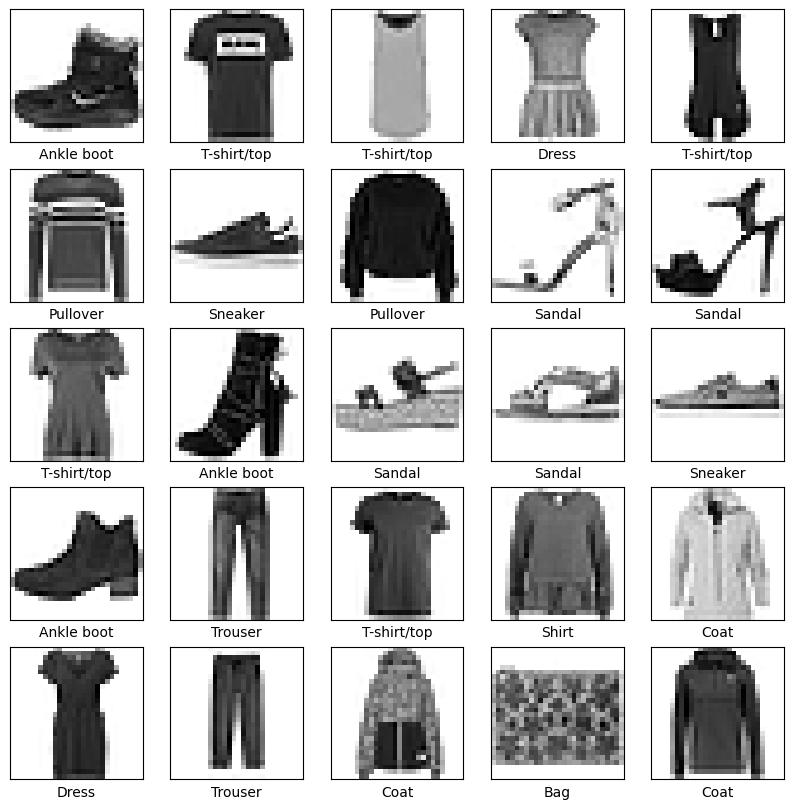

In [ ]:
# Show some of data
import matplotlib.pyplot as plt
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
# Normalization and reshape
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [ ]:
# split data for training and validation
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [ ]:
# batch_size = 64
# nb_classes = 10
# nb_ephochs = 50
# img_rows, img_cols = 28, 28
# nb_filters = 32
# pool_size = 2
# kernel_size = 3

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(rate=0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(rate=0.5),
    layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 5, 5, 32)          0         
                                                                 
 flatten_1 (Flatten)         (None, 800)               0

In [ ]:
train_labels.shape

(48000,)

In [ ]:
history = model.fit(train_images, train_labels, epochs=50,
                    validation_data=(val_images, val_labels),
                    batch_size=64)

Epoch 1/50
750/750 [==============================] - 10s 5ms/step - loss: 0.6882 - accuracy: 0.7470 - val_loss: 0.4300 - val_accuracy: 0.8410
Epoch 2/50
750/750 [==============================] - 4s 5ms/step - loss: 0.4610 - accuracy: 0.8347 - val_loss: 0.3640 - val_accuracy: 0.8648
Epoch 3/50
750/750 [==============================] - 4s 5ms/step - loss: 0.4008 - accuracy: 0.8543 - val_loss: 0.3277 - val_accuracy: 0.8770
Epoch 4/50
750/750 [==============================] - 4s 5ms/step - loss: 0.3679 - accuracy: 0.8657 - val_loss: 0.2972 - val_accuracy: 0.8877
Epoch 5/50
750/750 [==============================] - 3s 5ms/step - loss: 0.3439 - accuracy: 0.8760 - val_loss: 0.2867 - val_accuracy: 0.8945
Epoch 6/50
750/750 [==============================] - 4s 6ms/step - loss: 0.3248 - accuracy: 0.8811 - val_loss: 0.2835 - val_accuracy: 0.8913
Epoch 7/50
750/750 [==============================] - 4s 5ms/step - loss: 0.3109 - accuracy: 0.8862 - val_loss: 0.2731 - val_accuracy: 0.8977
Epoch

In [ ]:
# モデルの評価
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc*100}%")

313/313 [==============================] - 1s 3ms/step - loss: 0.2583 - accuracy: 0.9117
Test accuracy: 91.17000102996826%


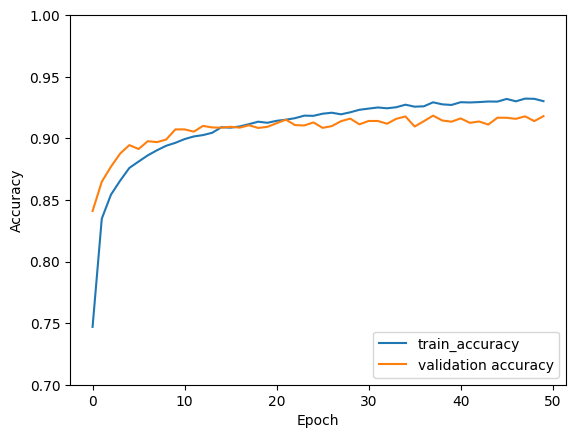

In [ ]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1])
plt.legend(loc='lower right')
plt.show()